In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

C:\Users\Aimpr\AppData\Local\Temp\ipykernel_21448\1607809514.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
X0 = np.array([[1], [1], [1], [1]]) 
X1 = np.array([[0], [0], [1], [1]]) 
X2 = np.array([[0], [1], [0], [1]])
y_and = np.array([[0], [0], [0], [1]]) ##AND
y_or = np.array([[0], [1], [1], [1]]) ##OR
y_XOR = np.array([[0], [1], [1], [0]]) ##XOR

X0_df = pd.DataFrame(X0, columns=['X0'])
X1_df = pd.DataFrame(X1, columns=['X1'])
X2_df = pd.DataFrame(X2, columns=['X2'])


X = pd.concat([X0_df, X1_df, X2_df], axis=1)


In [3]:
X3 = X1*X2 
X3_df = pd.DataFrame(X3, columns=['X3'])
X_XOR = pd.concat([X0_df, X1_df, X2_df, X3_df], axis=1)

Text(0.5, 1.0, 'XOR')

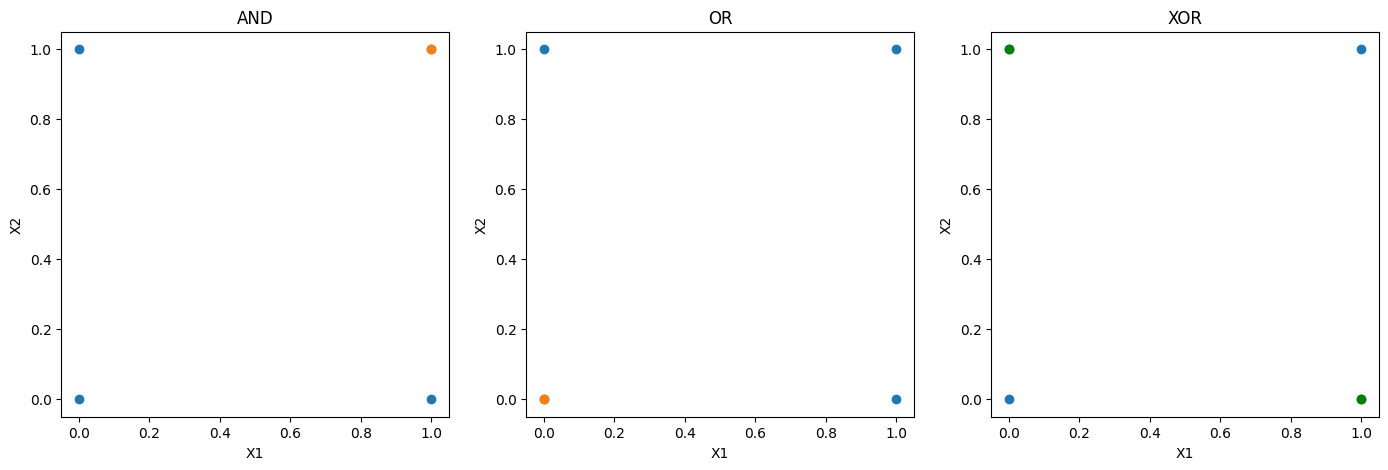

In [4]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.scatter(X1, X2)
plt.scatter(1, 1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("AND")

plt.subplot(1,3,2)
plt.scatter(X1, X2)
plt.scatter(0, 0)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("OR")

plt.subplot(1,3,3)
plt.scatter(X1, X2)
plt.scatter(0, 1, color='green')
plt.scatter(1, 0, color='green')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR")

In [5]:
def Normal(data_X, data_y):
    Xt = np.transpose(data_X)
    Xt_X = np.dot(Xt, data_X)
    Xt_X_inv = np.linalg.inv(Xt_X)
    Xt_y = np.dot(Xt, data_y)
    theta = np.dot(Xt_X_inv, Xt_y)
    return theta

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Hx2(W0, W1, W2, X1, X2):
    y_Predict = (W1 * X1 + W2 * X2) + W0
    return y_Predict

def Hx3(W0, W1, W2, W3, X1, X2, X3):
    y_Predict = (W1 * X1 + W2 * X2 + W3 * X3) + W0
    return y_Predict

def Costf(X1, X2, y, iterations=30):
    n = len(y)
    lr = 1
    
    W0 = 0  
    W1 = 1
    W2 = 1  
    
    cost_list = []
    W0_list = []
    W1_list = []
    W2_list = []

    for i in range(iterations):
        HX = Hx2(W0, W1, W2, X1, X2)
        HX1 = sigmoid(HX)

        cost = (-1/n) * np.sum(y * np.log(HX1) + (1 - y) * np.log(1 - HX1))
        
        dW = (HX1 - y)
        dW1_0 = dW* X1
        dW2_0 = dW* X2
        dB0 = dW

        dW1_1 = (1/n)* (np.sum(dW1_0))
        dW2_1 = (1/n)* (np.sum(dW2_0))
        dB1 = np.sum(dB0)

        result1_0 = lr * dW1_1
        result2_0 = lr * dW2_1
        result1 = lr * dB1

        W0 -= result1
        W1 -= result1_0
        W2 -= result2_0
        
        cost_list.append(cost)
        W0_list.append(W0)
        W1_list.append(W1)
        W2_list.append(W2)

        print(f"Iteration {i+1}: Cost = {cost}")
        print(f"W0 :{W0}")
        print(f"W1 :{W1}")
        print(f"W2 :{W2}")

    return cost_list, W1_list, W2_list, W0_list



In [7]:
def Costf2(X1, X2, X3, y, iterations=30):
    n = len(y)
    lr = 1
    
    W0 = 0  
    W1 = 1
    W2 = 1
    W3 = 1 
    
    cost_list = []
    W0_list = []
    W1_list = []
    W2_list = []
    W3_list = []

    for i in range(iterations):
        HX = Hx3(W0, W1, W2, W3, X1, X2, X3)
        HX1 = sigmoid(HX)

        cost = (-1/n) * np.sum(y * np.log(HX1) + (1 - y) * np.log(1 - HX1))

        dW = (HX1 - y)
        dW1_0 = dW* X1
        dW2_0 = dW* X2
        dW3_0 = dW* X3
        dB0 = dW
        #print(dW1_0, dW2_0)

        dW1_1 = (1/n)* (np.sum(dW1_0))
        dW2_1 = (1/n)* (np.sum(dW2_0))
        dW3_1 = (1/n)* (np.sum(dW3_0))
        dB1 = np.sum(dB0)
        #print(dW1_1, dW2_1)

        result1_0 = lr * dW1_1
        result2_0 = lr * dW2_1
        result3_0 = lr * dW3_1
        result1 = lr * dB1

        W0 -= result1
        W1 -= result1_0
        W2 -= result2_0
        W3 -= result3_0
        
        cost_list.append(cost)
        W0_list.append(W0)
        W1_list.append(W1)
        W2_list.append(W2)
        W3_list.append(W3)

        print(f"Iteration {i+1}: Cost = {cost}")
        print(f"W0 :{W0}")
        print(f"W1 :{W1}")
        print(f"W2 :{W2}")
        print(f"W3 :{W3}")

    return cost_list, W1_list, W2_list, W3_list, W0_list 

In [8]:
## AND ##
grd_and = Costf(X1, X2, y_and)
# print(grd_and)

Iteration 1: Cost = 0.8616496416598408
W0 :-1.8429142352378918
W1 :0.8470360858480281
W2 :0.8470360858480281
Iteration 2: Cost = 0.38651995552715146
W0 :-1.9819844553081498
W1 :0.9138834291609713
W2 :0.9138834291609713
Iteration 3: Cost = 0.3732784417313313
W0 :-2.0761425077188385
W1 :0.9845618752907273
W2 :0.9845618752907273
Iteration 4: Cost = 0.3612817227098701
W0 :-2.163492188012234
W1 :1.0534139831585239
W2 :1.0534139831585239
Iteration 5: Cost = 0.35008045087706563
W0 :-2.248119682883477
W1 :1.1199904724560912
W2 :1.1199904724560912
Iteration 6: Cost = 0.33959476654593457
W0 :-2.330609817693819
W1 :1.1843725123427549
W2 :1.1843725123427549
Iteration 7: Cost = 0.3297573913340799
W0 :-2.411115913622677
W1 :1.246695094333864
W2 :1.246695094333864
Iteration 8: Cost = 0.32050880047563224
W0 :-2.4897317133307943
W1 :1.3070896189211365
W2 :1.3070896189211365
Iteration 9: Cost = 0.31179624827629954
W0 :-2.5665396175183206
W1 :1.3656773030515852
W2 :1.3656773030515852
Iteration 10: Cost =

In [9]:
## OR ##
grd_or = Costf(X1, X2, y_or)
#print(grd_or)

Iteration 1: Cost = 0.36164964165984087
W0 :0.1570857647621079
W1 :1.0970360858480281
W2 :1.0970360858480281
Iteration 2: Cost = 0.3419468236343907
W0 :0.14884354198311656
W1 :1.1742763908105949
W2 :1.1742763908105949
Iteration 3: Cost = 0.33040667291626036
W0 :0.10834148504299801
W1 :1.245861539658003
W2 :1.245861539658003
Iteration 4: Cost = 0.3199285352144743
W0 :0.0607849979176156
W1 :1.3144411254920703
W2 :1.3144411254920703
Iteration 5: Cost = 0.3101082279436832
W0 :0.01273285341690722
W1 :1.3807817825056456
W2 :1.3807817825056456
Iteration 6: Cost = 0.30086636111339243
W0 :-0.034026744107525486
W1 :1.4451758612181562
W2 :1.4451758612181562
Iteration 7: Cost = 0.29215260780815094
W0 :-0.07905984092923951
W1 :1.507777902250172
W2 :1.507777902250172
Iteration 8: Cost = 0.28392336390226847
W0 :-0.12232951718082774
W1 :1.568697189344141
W2 :1.568697189344141
Iteration 9: Cost = 0.27613951713863616
W0 :-0.1639128752192061
W1 :1.628024971558324
W2 :1.628024971558324
Iteration 10: Cost 

In [10]:
## XOR ##
grd_XOR = Costf2(X1, X2, X3, y_XOR)

Iteration 1: Cost = 1.092064476792534
W0 :-0.9146912840824432
W1 :0.8290918236368905
W2 :0.8290918236368905
W3 :0.7618564682943917
Iteration 2: Cost = 0.879110759875604
W0 :-0.9763293646764827
W1 :0.7548458054071975
W2 :0.7548458054071975
W3 :0.5572637481145724
Iteration 3: Cost = 0.830002571976235
W0 :-0.8881583850077136
W1 :0.706507320704891
W2 :0.706507320704891
W3 :0.37013885259530344
Iteration 4: Cost = 0.789593185701194
W0 :-0.7989917092183477
W1 :0.6653494185731222
W2 :0.6653494185731222
W3 :0.19265887481691413
Iteration 5: Cost = 0.7538361294358205
W0 :-0.7160787986639892
W1 :0.6302977234203897
W2 :0.6302977234203897
W3 :0.024266946035074816
Iteration 6: Cost = 0.72230966800985
W0 :-0.6399540325783994
W1 :0.6010351433560317
W2 :0.6010351433560317
W3 :-0.13535366609279828
Iteration 7: Cost = 0.6945569621385083
W0 :-0.5708543142581879
W1 :0.5771921819591868
W2 :0.5771921819591868
W3 :-0.2866287510830562
Iteration 8: Cost = 0.6701139784088757
W0 :-0.5087477964962459
W1 :0.55837485

In [11]:
print("AND",Normal(X, y_and))
print('\n')
print("OR",Normal(X, y_or))
print('\n')
print("XOR",Normal(X_XOR, y_XOR))

AND [[-0.25]
 [ 0.5 ]
 [ 0.5 ]]


OR [[0.25]
 [0.5 ]
 [0.5 ]]


XOR [[ 0.]
 [ 1.]
 [ 1.]
 [-2.]]


Text(0.5, 0, 'W1 & W2')

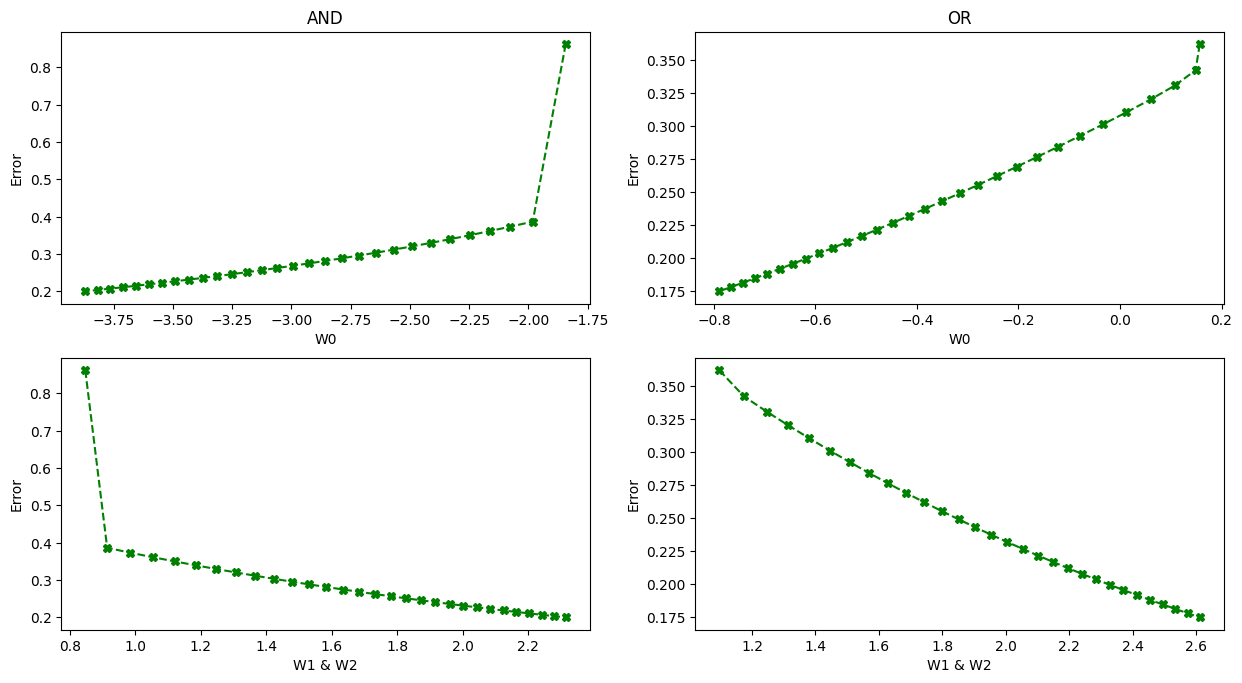

In [12]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(grd_and[3], grd_and[0], '--gX')
plt.title("AND")
plt.ylabel('Error')
plt.xlabel('W0')

plt.subplot(3,2,2)
plt.plot(grd_or[3], grd_or[0], '--gX')
plt.title("OR")
plt.ylabel('Error')
plt.xlabel('W0')

plt.subplot(3,2,3)
plt.plot(grd_and[1], grd_and[0], '--gX')
plt.ylabel('Error')
plt.xlabel('W1 & W2')

plt.subplot(3,2,4)
plt.plot(grd_or[1], grd_or[0], '--gX')
plt.ylabel('Error')
plt.xlabel('W1 & W2')

Text(0.5, 0, 'W3')

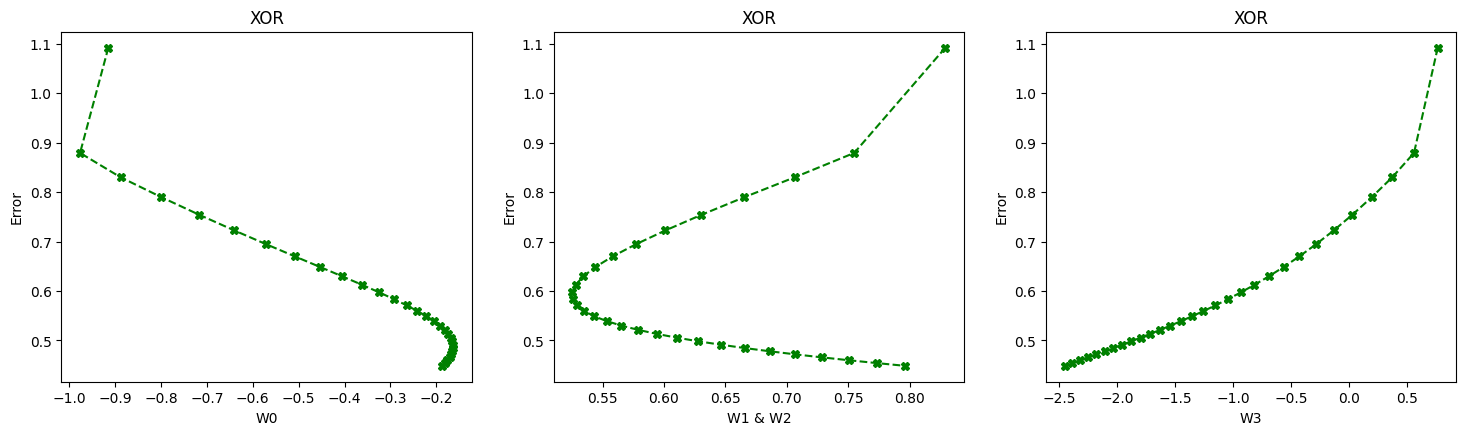

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.plot(grd_XOR[4], grd_XOR[0], '--gX')
plt.title("XOR")
plt.ylabel('Error')
plt.xlabel('W0')

plt.subplot(2,3,2)
plt.plot(grd_XOR[1], grd_XOR[0], '--gX')
plt.title("XOR")
plt.ylabel('Error')
plt.xlabel('W1 & W2')

plt.subplot(2,3,3)
plt.plot(grd_XOR[3], grd_XOR[0], '--gX')
plt.title("XOR")
plt.ylabel('Error')
plt.xlabel('W3')

In [14]:
print("AND")
print("W0 :",grd_and[3][-1])
print("W1 :",grd_and[1][-1])
print("W2 :",grd_and[2][-1])
print('\n')

print("OR")
print("W0 :",grd_or[3][-1])
print("W1 :",grd_or[1][-1])
print("W2 :",grd_or[2][-1])
print('\n')

print("XOR")
print("W0 :",grd_XOR[4][-1])
print("W1 :",grd_XOR[1][-1])
print("W2 :",grd_XOR[2][-1])
print("W3 :",grd_XOR[3][-1])
print('\n')

AND
W0 : -3.8693622470423503
W1 : 2.3151903906733984
W2 : 2.3151903906733984


OR
W0 : -0.7892562177583394
W1 : 2.611304510945433
W2 : 2.611304510945433


XOR
W0 : -0.18834059281401827
W1 : 0.7960512974900089
W2 : 0.7960512974900089
W3 : -2.453049249819924




In [15]:
def predict(result, th):
    result_list = []
    for i in result:
        if i < th:
            result_list.append(0)
        elif i >= th:
            result_list.append(1)
    return result_list

In [16]:
## h(x) = g(W0 + X1W1 + X2W2) ##
hx1 = (grd_and[3][-1] + X1*(grd_and[1][-1]) + X2*(grd_and[2][-1]))
hx2 = (grd_or[3][-1] + X1*(grd_or[1][-1]) + X2*(grd_or[2][-1]))
hx3 = (grd_XOR[4][-1] + X1*(grd_XOR[1][-1]) + X2*(grd_XOR[2][-1]) + X3*(grd_XOR[3][-1]))

print("AND")
print(sigmoid(hx1))
print('\n')
print("OR")
print(sigmoid(hx2))
print('\n')
print("XOR")
print(sigmoid(hx3))

AND
[[0.02044496]
 [0.17448454]
 [0.17448454]
 [0.68157483]]


OR
[[0.3123284 ]
 [0.86081172]
 [0.86081172]
 [0.98826474]]


XOR
[[0.45305354]
 [0.64741841]
 [0.64741841]
 [0.25936199]]


In [17]:
print("AND", sigmoid(hx1))
print("OR", sigmoid(hx2))
print("XOR", sigmoid(hx3))

AND [[0.02044496]
 [0.17448454]
 [0.17448454]
 [0.68157483]]
OR [[0.3123284 ]
 [0.86081172]
 [0.86081172]
 [0.98826474]]
XOR [[0.45305354]
 [0.64741841]
 [0.64741841]
 [0.25936199]]


In [18]:
print("Threshold = 0.5")
print("AND", predict(sigmoid(hx1), 0.5))
print("OR", predict(sigmoid(hx2), 0.5))
print("XOR", predict(sigmoid(hx3), 0.5))

Threshold = 0.5
AND [0, 0, 0, 1]
OR [0, 1, 1, 1]
XOR [0, 1, 1, 0]


Text(0.5, 1.0, 'XOR')

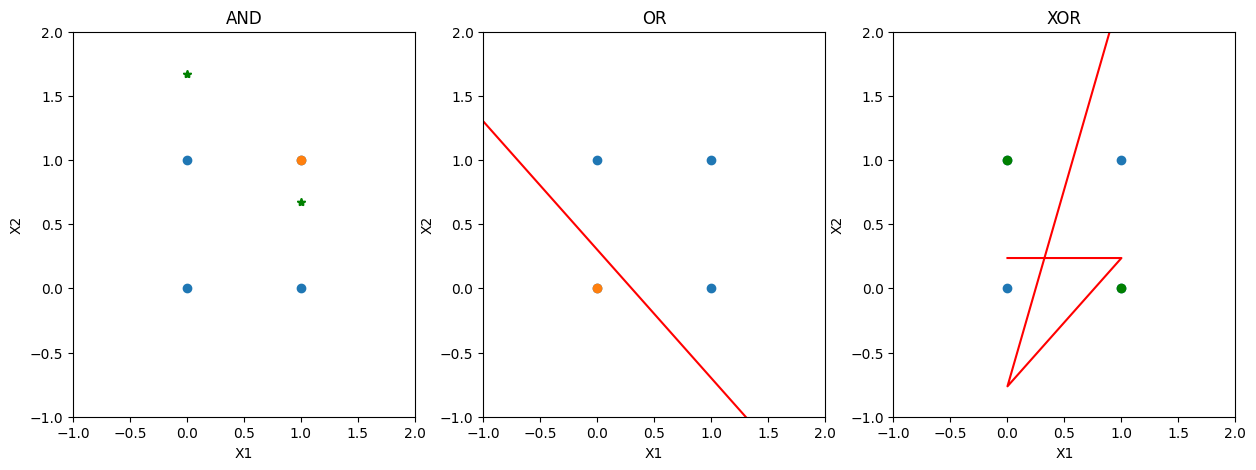

In [21]:
## X2 = -(W0 + W1X1)/W2 | X1 = -(W0 + W2X2)/W1

line = np.linspace(-1, 2, 10)
dbound1 = -(grd_and[3][-1] + grd_and[1][-1]*(X1))/grd_and[1][-1]
dbound2  = -(grd_or[3][-1] + grd_or[1][-1]*(line))/grd_or[1][-1]

dbound3_1  = -(grd_XOR[4][-1] + grd_XOR[1][-1]*(X1) + grd_XOR[2][-1]*(X2))/grd_XOR[3][-1]
dbound3_2  = -(grd_XOR[4][-1] + grd_XOR[1][-1]*(X1) + grd_XOR[3][-1]*(X3))/grd_XOR[2][-1]
dbound3_3  = -(grd_XOR[4][-1] + grd_XOR[3][-1]*(X3) + grd_XOR[2][-1]*(X2))/grd_XOR[1][-1]

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(X1, X2)
plt.scatter(1, 1)
plt.plot(X1, dbound1, 'g*')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("AND")

plt.subplot(1,3,2)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(X1, X2)
plt.scatter(0, 0)
plt.plot(line, dbound2, color='red')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("OR")

plt.subplot(1,3,3)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.scatter(X1, X2)
plt.scatter(0, 1, color='green')
plt.scatter(1, 0, color='green')
# plt.plot(X3, dbound3_1, color='red')
plt.plot(X2, dbound3_2, color='red')
# plt.plot(X1, dbound3_3, color='red')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR")